# Load and explore data

In [1]:
# Point 1: Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Point 2: Read the dataset and explore it
fifa_data = pd.read_csv('fifa.csv')

# Display the first few samples
print("First few samples:")
print(fifa_data.head())

First few samples:
       ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         9

In [3]:
#Display the shape of the data
print(fifa_data.shape)

# Display information about the data, including data types and missing values
print(fifa_data.info())

(18207, 60)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64

In [4]:
print(fifa_data['Work Rate'])

0        Medium/ Medium
1             High/ Low
2          High/ Medium
3        Medium/ Medium
4            High/ High
              ...      
18202    Medium/ Medium
18203    Medium/ Medium
18204    Medium/ Medium
18205    Medium/ Medium
18206    Medium/ Medium
Name: Work Rate, Length: 18207, dtype: object


In [5]:
# Point 3: Drop redundant columns
redundant_columns = ['Photo', 'Flag', 'Club Logo', 'Body Type','Loaned From','Work Rate' ]
fifa_data = fifa_data.drop(columns=redundant_columns, axis=1)

# Display updated data shape after dropping columns
print("\nData shape after dropping redundant columns:")
print(fifa_data.shape)



Data shape after dropping redundant columns:
(18207, 54)


In [6]:
#No duplicate data present
fifa_data.duplicated().sum()

0

# Data Cleaning and Preprocessing (18 points)

In [20]:
# Point 4
print(fifa_data[['Value', 'Wage', 'Release Clause']].head())

         Value      Wage  Release Clause
0  110500000.0  565000.0     226500000.0
1   77000000.0  405000.0     127100000.0
2  118500000.0  290000.0     228100000.0
3   72000000.0  260000.0     138600000.0
4  102000000.0  355000.0     196400000.0


In [19]:
# Function to convert currency values to float
def convert_curr(currency_value):
    if isinstance(currency_value, float):
        return currency_value
    elif 'M' in currency_value:
        return float(currency_value.replace('€', '').replace('M', '')) * 1000000
    elif 'K' in currency_value:
        return float(currency_value.replace('€', '').replace('K', '')) * 1000
    else:
        return float(currency_value.replace('€', ''))


In [17]:
#Converting 'Value' column
fifa_data['Value'] = fifa_data['Value'].apply(convert_curr)

# Converting 'Wage' column
fifa_data['Wage'] = fifa_data['Wage'].apply(convert_curr)

# Converting 'Release Clause' column
fifa_data['Release Clause'] = fifa_data['Release Clause'].apply(convert_curr)


In [18]:
# Updated dataframe
print(fifa_data[['Value', 'Wage', 'Release Clause']].head())

         Value      Wage  Release Clause
0  110500000.0  565000.0     226500000.0
1   77000000.0  405000.0     127100000.0
2  118500000.0  290000.0     228100000.0
3   72000000.0  260000.0     138600000.0
4  102000000.0  355000.0     196400000.0


In [22]:
# Point 5
fifa_data['Joined'].head(10)

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
5     Jul 1, 2012
6     Aug 1, 2012
7    Jul 11, 2014
8     Aug 1, 2005
9    Jul 16, 2014
Name: Joined, dtype: object

In [30]:
fifa_data['Joined'] = pd.to_datetime(fifa_data['Joined'], errors='coerce').dt.year.astype('Int64')

In [31]:
fifa_data['Joined'].head(10)

0    1970
1    1970
2    1970
3    1970
4    1970
5    1970
6    1970
7    1970
8    1970
9    1970
Name: Joined, dtype: Int64

In [25]:
#Point 6
fifa_data['Contract Valid Until'].head(5)

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

In [32]:
fifa_data['Contract Valid Until'] = pd.to_datetime(fifa_data['Contract Valid Until'], errors='coerce')

In [33]:
fifa_data['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

In [34]:
# Point 7
fifa_data['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

In [49]:
#convert height to float
def convert_height(height):
    if isinstance(height, float):
        return height 
    else:
        feet, inches = map(int, height.split("'"))
        total_inches = feet * 12 + inches
        return total_inches

In [41]:
fifa_data['Height'] = fifa_data['Height'].apply(convert_height)

In [46]:
print(fifa_data['Height'].head())

0    67.0
1    74.0
2    69.0
3    76.0
4    71.0
Name: Height, dtype: float64


In [48]:
# Point 8
fifa_data['Weight'].head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [50]:
def convert_weight(weight):
    if isinstance(weight, float):
        return weight  # Return as is if already a float
    else:
        return float(weight.replace('lbs', ''))


In [51]:
fifa_data['Weight'] = fifa_data['Weight'].apply(convert_weight)

In [52]:
fifa_data['Weight'].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [57]:
# Point 9
#Finding percentage of missing values in each column
miss_percent=fifa_data.isnull().mean()*100
print(miss_percent[miss_percent > 0])

Club                        1.323667
Preferred Foot              0.263635
International Reputation    0.263635
Weak Foot                   0.263635
Skill Moves                 0.263635
Position                    0.329544
Jersey Number               0.329544
Joined                      8.529686
Contract Valid Until        1.587302
Height                      0.263635
Weight                      0.263635
Crossing                    0.263635
Finishing                   0.263635
HeadingAccuracy             0.263635
ShortPassing                0.263635
Volleys                     0.263635
Dribbling                   0.263635
Curve                       0.263635
FKAccuracy                  0.263635
LongPassing                 0.263635
BallControl                 0.263635
Acceleration                0.263635
SprintSpeed                 0.263635
Agility                     0.263635
Reactions                   0.263635
Balance                     0.263635
ShotPower                   0.263635
J

In [60]:
# Imputing numerical columns with mean
num_columns = fifa_data.select_dtypes(include=['float64', 'int64']).columns
fifa_data[num_columns] = fifa_data[num_columns].fillna(fifa_data[num_columns].mean())

# Impute categorical columns with mode
cat_columns = fifa_data.select_dtypes(include=['object','datetime64']).columns
fifa_data[cat_columns] = fifa_data[cat_columns].fillna(fifa_data[cat_columns].mode().iloc[0])

In [62]:
fifa_data.isnull().mean()

ID                          0.0
Name                        0.0
Age                         0.0
Nationality                 0.0
Overall                     0.0
Potential                   0.0
Club                        0.0
Value                       0.0
Wage                        0.0
Preferred Foot              0.0
International Reputation    0.0
Weak Foot                   0.0
Skill Moves                 0.0
Position                    0.0
Jersey Number               0.0
Joined                      0.0
Contract Valid Until        0.0
Height                      0.0
Weight                      0.0
Crossing                    0.0
Finishing                   0.0
HeadingAccuracy             0.0
ShortPassing                0.0
Volleys                     0.0
Dribbling                   0.0
Curve                       0.0
FKAccuracy                  0.0
LongPassing                 0.0
BallControl                 0.0
Acceleration                0.0
SprintSpeed                 0.0
Agility 

# Exploratory Data Analysis

In [63]:
fifa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 54 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      18207 non-null  object        
 7   Value                     18207 non-null  float64       
 8   Wage                      18207 non-null  float64       
 9   Preferred Foot            18207 non-null  object        
 10  International Reputation  18207 non-null  float64       
 11  Weak Foot                 18207 non-null  float64       
 12  Skill Moves       

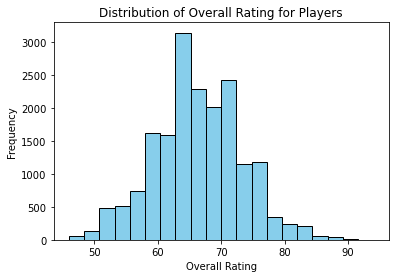

In [79]:
# Point 10
plt.hist(fifa_data['Overall'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Rating for Players')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

In [83]:
# Point 11
top20 = fifa_data.nlargest(20, 'Overall')
print(top20[['Name', 'Overall']])

                 Name  Overall
0            L. Messi       94
1   Cristiano Ronaldo       94
2           Neymar Jr       92
3              De Gea       91
4        K. De Bruyne       91
5           E. Hazard       91
6           L. Modrić       91
7           L. Suárez       91
8        Sergio Ramos       91
9            J. Oblak       90
10     R. Lewandowski       90
11           T. Kroos       90
12           D. Godín       90
13        David Silva       90
14           N. Kanté       89
15          P. Dybala       89
16            H. Kane       89
17       A. Griezmann       89
18      M. ter Stegen       89
19        T. Courtois       89


In [88]:
# Point 12
print(top20)

        ID               Name  Age Nationality  Overall  Potential  \
0   158023           L. Messi   31   Argentina       94         94   
1    20801  Cristiano Ronaldo   33    Portugal       94         94   
2   190871          Neymar Jr   26      Brazil       92         93   
3   193080             De Gea   27       Spain       91         93   
4   192985       K. De Bruyne   27     Belgium       91         92   
5   183277          E. Hazard   27     Belgium       91         91   
6   177003          L. Modrić   32     Croatia       91         91   
7   176580          L. Suárez   31     Uruguay       91         91   
8   155862       Sergio Ramos   32       Spain       91         91   
9   200389           J. Oblak   25    Slovenia       90         93   
10  188545     R. Lewandowski   29      Poland       90         90   
11  182521           T. Kroos   28     Germany       90         90   
12  182493           D. Godín   32     Uruguay       90         90   
13  168542        Da

In [90]:
#Point 13
avg_age=top20['Age'].mean()
avg_weight=top20['Weight'].mean()
print("Average age of top 20 players: ", avg_age)
print("Average weight of top 20 players: ", avg_weight)

Average age of top 20 players:  28.3
Average weight of top 20 players:  171.5


In [92]:
#Point 14
hwage_player = top20.loc[top20['Wage'].idxmax()]
print("Player with the highest wage is ", hwage_player['Name'], " with a wage of ", hwage_player['Wage'])

Player with the highest wage is  L. Messi  with a wage of  565000.0


In [95]:
#Point 15
specific_cols=['Name', 'Club', 'Wage','Overall']
specific_df=fifa_data[specific_cols]
print(specific_df.head())

                Name                 Club      Wage  Overall
0           L. Messi         FC Barcelona  565000.0       94
1  Cristiano Ronaldo             Juventus  405000.0       94
2          Neymar Jr  Paris Saint-Germain  290000.0       92
3             De Gea    Manchester United  260000.0       91
4       K. De Bruyne      Manchester City  355000.0       91


In [96]:
#15.1
avg_or = specific_df.groupby('Club')['Overall'].mean().reset_index()
print(avg_or.head())

                    Club    Overall
0    SSV Jahn Regensburg  65.586207
1  1. FC Heidenheim 1846  65.750000
2   1. FC Kaiserslautern  63.384615
3             1. FC Köln  70.785714
4        1. FC Magdeburg  65.615385


                    Club    Overall
326             Juventus  82.280000
398               Napoli  80.000000
315                Inter  79.750000
470          Real Madrid  78.242424
382                Milan  78.074074
212         FC Barcelona  78.030303
435  Paris Saint-Germain  77.433333
482                 Roma  77.423077
375    Manchester United  77.242424
504           SL Benfica  77.000000


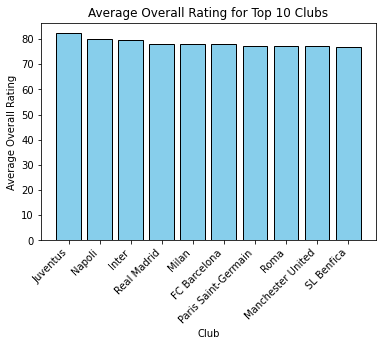

In [104]:
#15.2
top_10_club = avg_or.sort_values(by='Overall', ascending=False).head(10)
print(top_10_club)
plt.bar(top_10_club['Club'], top_10_club['Overall'], color='skyblue', edgecolor='black')
plt.title('Average Overall Rating for Top 10 Clubs')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.show()

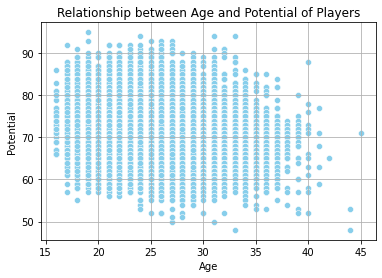

In [114]:
# Point 16
sns.scatterplot(x='Age', y='Potential', data=fifa_data, color='skyblue')
plt.title('Relationship between Age and Potential of Players')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.grid(True)
plt.show()
# What we can infer from the scatter plot is that with increasing age, the potential of players is reducing

In [131]:
# Point 17
# potential, Overall, value, international reputation, and Release Clause
selected_data = fifa_data[['Potential','Overall','Value','International Reputation','Release Clause','Wage']]
corr_matrix=selected_data.corr()
correlation_matrix = corr_matrix['Wage'].drop('Wage')

print(correlation_matrix)

Potential                   0.486413
Overall                     0.571926
Value                       0.858442
International Reputation    0.668515
Release Clause              0.828161
Name: Wage, dtype: float64


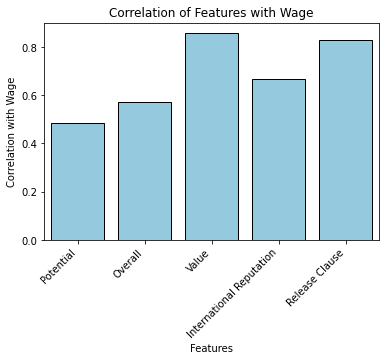

In [145]:
# Plotting the correlation with 'Wage'
sns.barplot(x=correlation_matrix.index, y=correlation_matrix.values, color='skyblue', edgecolor='black')
plt.title('Correlation of Features with Wage')
plt.xlabel('Features')
plt.ylabel('Correlation with Wage')
plt.xticks(rotation=45, ha='right')
plt.show()
# Here, 'Value' has the highest correlation with 'Wage'

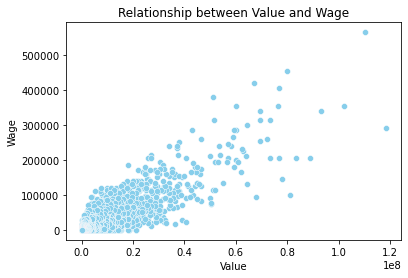

Correlation metric between Value and Wage: 0.86


In [132]:
# Scatter plot between 'Wage' and 'Value'
sns.scatterplot(x='Value', y='Wage', data=selected_data, color='skyblue')
plt.title('Relationship between Value and Wage')
plt.xlabel('Value')
plt.ylabel('Wage')
plt.show()

# Display the correlation metric for the identified feature
correlation_metric = corr_matrix.loc['Value', 'Wage']
print(f"Correlation metric between Value and Wage: {correlation_metric:.2f}")

Position in the pitch with the maximum number of players:  ST
Position in the pitch with the minimum number of players:  LF


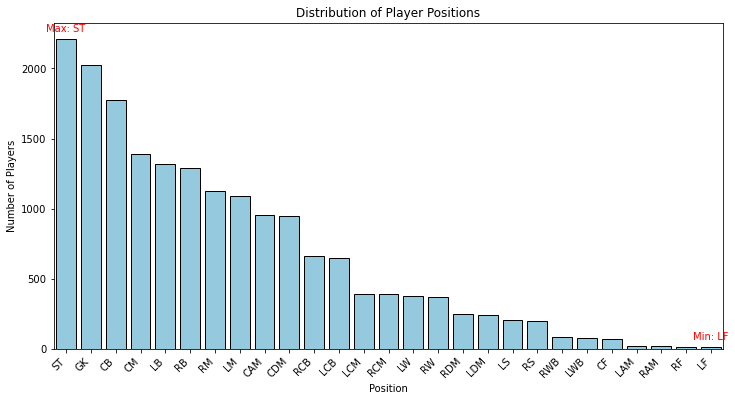

In [148]:
# Point 18
# Count the number of players for each position
pos_count = fifa_data['Position'].value_counts()

# Find the position with the maximum and minimum number of players
max_pos = pos_count.idxmax()
min_pos = pos_count.idxmin()
print("Position in the pitch with the maximum number of players: ",max_pos)
print("Position in the pitch with the minimum number of players: ", min_pos)
# Plot the distribution of player positions
plt.figure(figsize=(12, 6))
sns.countplot(x='Position', data=fifa_data, order=pos_count.index, color='skyblue', edgecolor='black')
plt.title('Distribution of Player Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')

# Highlighting the position with the maximum number of players
plt.text(pos_count.index.get_loc(max_pos), pos_count.max() + 50, f'Max: {max_pos}', color='red', ha='center')

# Highlighting the position with the minimum number of players
plt.text(pos_count.index.get_loc(min_pos),pos_count.min() + 50, f'Min: {min_pos}', color='red', ha='center')

plt.show()

In [152]:
# Point 19
req_players=fifa_data[(fifa_data['Club'] == 'Juventus') & (fifa_data['Wage'] > 200000)]
print(req_players)
# We have 3 such players

        ID               Name  Age Nationality  Overall  Potential      Club  \
1    20801  Cristiano Ronaldo   33    Portugal       94         94  Juventus   
15  211110          P. Dybala   24   Argentina       89         94  Juventus   
24  138956       G. Chiellini   33       Italy       89         89  Juventus   

         Value      Wage Preferred Foot  ...  Composure  Marking  \
1   77000000.0  405000.0          Right  ...       95.0     28.0   
15  89000000.0  205000.0           Left  ...       84.0     23.0   
24  27000000.0  215000.0           Left  ...       84.0     93.0   

    StandingTackle SlidingTackle  GKDiving  GKHandling GKKicking  \
1             31.0          23.0       7.0        11.0      15.0   
15            20.0          20.0       5.0         4.0       4.0   
24            93.0          90.0       3.0         3.0       2.0   

    GKPositioning  GKReflexes  Release Clause  
1            14.0        11.0     127100000.0  
15            5.0         8.0     153

In [159]:
# Point 20
top_pos_players = fifa_data.groupby('Position').apply(lambda x: x.nlargest(5, 'Overall')).reset_index(drop=True)

In [160]:
# Point 21
avg_wage_pos=top_pos_players.groupby('Position')['Wage'].mean().sort_values(ascending=False)
print(avg_wage_pos)

Position
ST     294000.0
LW     261000.0
RCM    240800.0
RCB    231000.0
CDM    217000.0
RW     202000.0
GK     192800.0
LCM    184400.0
LB     177200.0
CAM    174000.0
LM     164600.0
LCB    162000.0
RB     155400.0
RF     148000.0
CB     139600.0
RS     132200.0
RM     131400.0
CM     130600.0
LS     130200.0
LDM    126600.0
LF     121200.0
RDM    105000.0
LAM     81600.0
CF      47400.0
RAM     45400.0
RWB     44200.0
LWB     34200.0
Name: Wage, dtype: float64
